In [111]:
import math
import modcma.c_maes as mcma
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import ioh


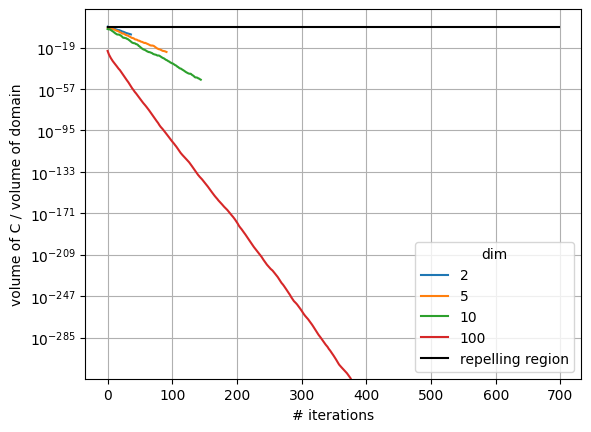

In [84]:
def volume(r, d):
    d_over_2 = 2 / d
    return pow(math.pi, d_over_2) / math.gamma(d_over_2 + 1) * pow(r, d)
    
def volume_sd(opt):
    r = 3 * opt.p.mutation.sigma
    
    B, d = opt.p.adaptation.B, opt.p.adaptation.d
    c_sqrt = B.dot(np.diag(d)).dot(B.T)
    
    det_sqrt_C = np.linalg.det(c_sqrt)
    return  volume(r, opt.p.settings.dim) * det_sqrt_C


for dim in [2, 5, 10, 100]:
    problem = ioh.get_problem(1, 1, dim)

    domain_volume = np.prod(np.ones(dim) * 10)

    settings = mcma.Settings(dim, None)
    settings.dim = dim
    settings.target = problem.optimum.y + 1e-8
    opt = mcma.ModularCMAES(settings)

    vols = []
    t = []
    while not opt.break_conditions():
        vol_c = volume_sd(opt)
        t.append(opt.p.stats.t)
        vols.append(vol_c / domain_volume)
        opt.step(problem)

    p = plt.semilogy(t, vols, label=dim)
    repelling_region_volume = (1 / 2.0) * domain_volume
    
plt.semilogy(
    t, 
    np.ones(len(t)) * repelling_region_volume / domain_volume, 
    color="black", 
    label="repelling region"
)
    
plt.xlabel("# iterations")
plt.ylabel("volume of C / volume of domain")
plt.grid()
plt.legend(title="dim")
# plt.xlim(0, 20)
# plt.ylim(1e-15, 1)
    

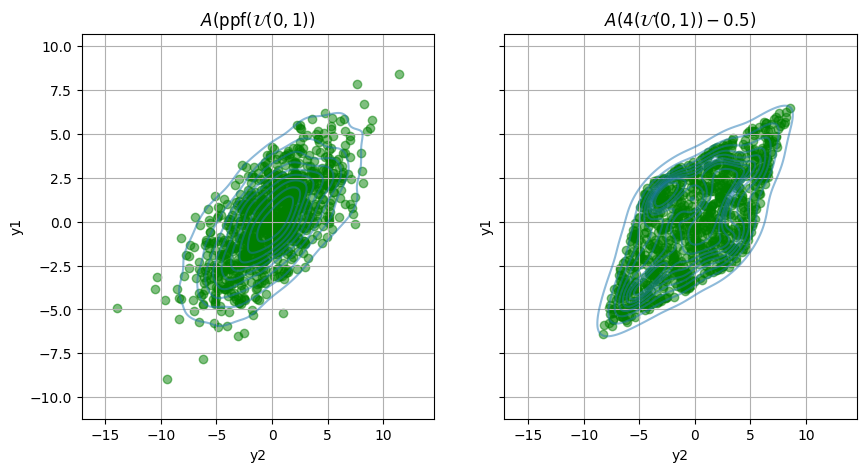

In [163]:
n = 2
k = 1000
# A = np.eye(n)

A = np.random.uniform((n, n))
A = np.triu(A) + np.triu(A).T

U = np.random.uniform(size=(n, k))
Z = scipy.stats.norm.ppf(U)
Y = A @ Z
Yu = A @ (4 * (U - .5))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True)

for ax in (ax1, ax2):
    # ax.set_aspect("equal")
    ax.grid()
    ax.set_ylabel("y1")
    ax.set_xlabel("y2")


ax1.set_title(r"$A (\text{ppf}(\mathcal{U}(0, 1))$")
sns.kdeplot(x=Y[0, :], y=Y[1, :], ax=ax1, alpha=.5)
ax1.scatter(Y[0, :], Y[1, :], alpha=.5, color='green')

ax2.set_title(r"$A (4(\mathcal{U}(0, 1)) - 0.5)$");
sns.kdeplot(x=Yu[0, :], y=Yu[1, :], ax=ax2, alpha=.5)
ax2.scatter(Yu[0, :], Yu[1, :], alpha=.5, color='green')
